In [9]:
from scipy.stats import uniform

def my_rand_values(valori, probabilitati, N):
    X = []
    U = uniform.rvs(size=N) # u generat pe baza unei distributii uniforme
    for i in range(N):
        pozitie = 0
        sum_prob = probabilitati[0]
        while U[i] > sum_prob:
            pozitie += 1
            sum_prob += probabilitati[pozitie]
        X.append(valori[pozitie])
    return X

# cu a doua implementare se initializeaza sum_prob cu 1
# conditia e U[i] < sum_prob
# sum_prob tot scade 

my_rand_values(range(4), [0.46, 0.4, 0.1, 0.04], 10)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 3]

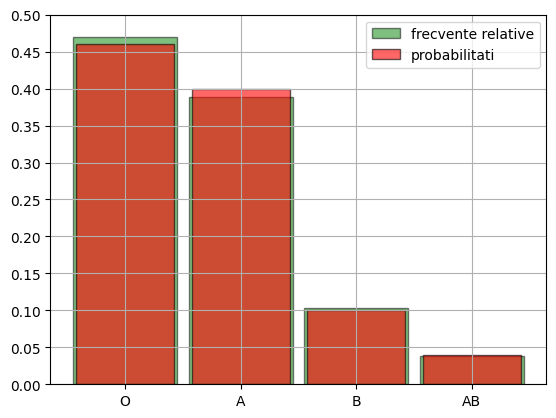

In [13]:
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks , yticks

valori, probabilitati = range(4), [0.46, 0.4, 0.1, 0.04]
data = my_rand_values(valori, probabilitati, 1000)
bin_edges = [k+0.5 for k in range(-1, 4)]
hist(data, bins=bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')

distribution = dict([k, probabilitati[k]] for k in range(4))
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')

xticks(ticks=range(4), labels=("O", "A", "B", "AB"))
yticks([k/100 for k in range(0, 55, 5)])
legend(loc = 'upper right')
grid()
show()

data = my_rand_values(valori, probabilitati, 1000)
bin_edges = [k+0.5 for k in range(-1, 4)]
hist(data, bins=bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')

distribution = dict([k, probabilitati[k]] for k in range(4))
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')

xticks(ticks=range(4), labels=("O", "A", "B", "AB"))
yticks([k/100 for k in range(0, 55, 5)])
legend(loc = 'upper right')
grid()
show()

In [14]:
from scipy.stats import uniform
from math import log

def my_exp_random_values(alpha, N):
    u = uniform.rvs(size=N)
    X = [-1/alpha * log(1-u[i]) for i in range(N)]
    return X

 # generare X
my_exp_random_values(1/12, 10) # -> timpi, secunde

[5.091080042785755,
 6.43465186289257,
 12.115151813505548,
 3.0725422649159446,
 12.239286328605784,
 14.295638506356445,
 0.556756801519191,
 1.0901066553038654,
 9.626575659839904,
 9.514025151148722]

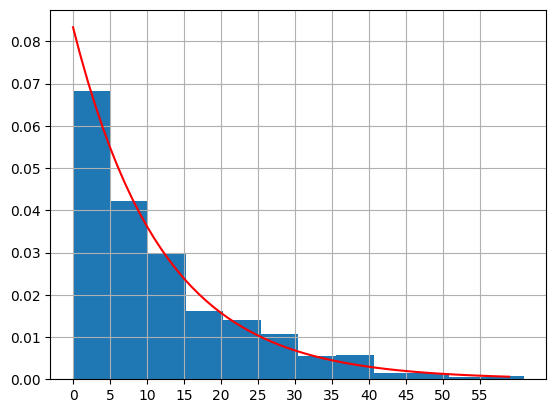

In [15]:
from matplotlib.pyplot import show, hist, grid, legend, xticks, plot
from scipy.stats import expon

alpha = 1/12
data = my_exp_random_values(alpha, 1000)

hist(data, bins=12, density = True,range=(0,61))
x = range(60)

plot(x,expon.pdf(x,loc=0,scale=1/alpha),'r-')
xticks(range(0,60,5))
grid()
show()

In [25]:
# prin simulari

sum(x >= 5 for x in data)/len(data) # supra numarul de simulari

0.658

In [26]:
1 - expon.cdf(5, scale=1/alpha) # cumulative distribution function

np.float64(0.6592406302004438)